#### 3. Computing vertical gradients

Using data from one station on the West Coast Ocean Acidification cruise, estimate the vertical gradient of nitrate $\Delta N$/$\Delta z$ at locations throughout the water column. Pressure can be used as the vertical coordinate, $z$.

Use Python to make this calculation two different ways:

1. Using a for loop.
2. Not using a for loop.

Make sure that both calculations work for different profiles that have a different number of samples.

<IPython.core.display.Javascript object>


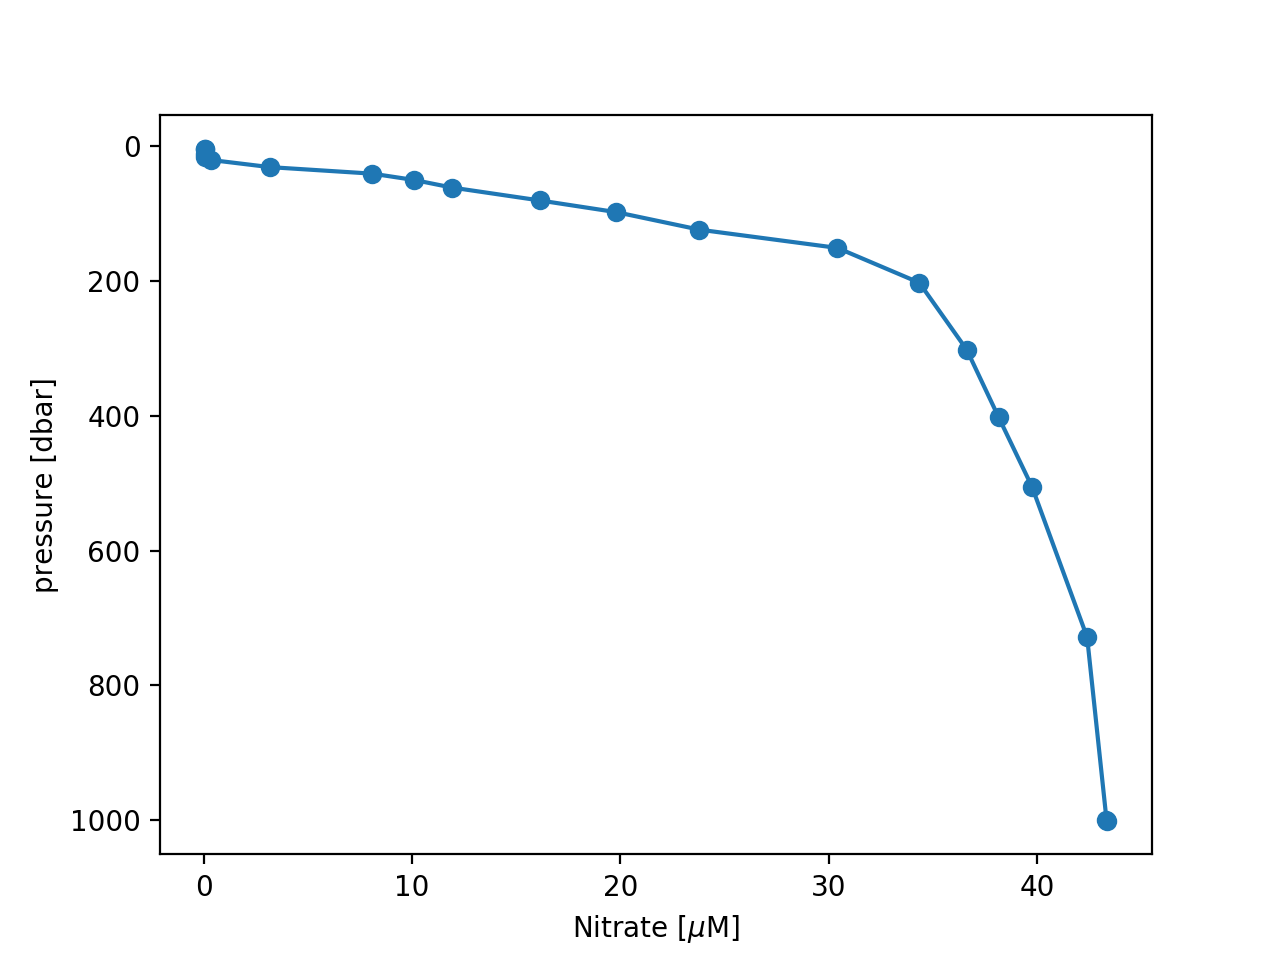

Text(0,0.5,'pressure [dbar]')

In [2]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# you may need to change this, depending on where your data file is
filename = './week03_wcoa_cruise/WCOA2013_hy1.csv' 
df = pd.read_csv(filename,header=31,na_values=-999,
                 parse_dates=[[8,9]])

# Create a new data frame, using only cast number 12
idx = (df['STNNBR'] == 12)
cast = df.loc[idx]

plt.figure()
plt.plot(cast['NITRAT'],cast['CTDPRS'],'-o')
plt.gca().invert_yaxis()
plt.xlabel('Nitrate [$\mu$M]')
plt.ylabel('pressure [dbar]')

In [6]:
#vertical gradient of nitrate  ΔN/Δz at locations throughout the water column w/for loop
z=cast['CTDPRS']
N=cast['NITRAT']

z=np.array(z)
N=np.array(N)

dNdz=[]

for x in np.arange(0,len(z)-1):
    
    z1=z[x]
    z2=z[x+1]
    N1=N[x]
    N2=N[x+1]
    
    dz=z1-z2
    dN=N1-N2
    
    Nz=dN/dz
    dNdz = np.append(dNdz,Nz)
    
print('ΔN/Δz from the bottom of the water column to the top:',dNdz)

ΔN/Δz from the bottom of the water column to the top: [ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675      0.          0.00147059
  0.        ]


In [7]:
#vertical gradient of nitrate  ΔN/Δz at locations throughout the water column w/o for loop

z1=cast['CTDPRS']
z2=[0]
N1=cast['NITRAT']
N2=[0]

z1=np.array(z1)
z2=np.array(z2)
N1=np.array(N1)
N2=np.array(N2)

z1 = np.append(z1,0)
z2 = np.append(z2,cast['CTDPRS'])
N1 = np.append(N1,0)
N2 = np.append(N2,cast['NITRAT'])

dz=z1-z2
dN=N1-N2

dz=dz[1:-1]
dN=dN[1:-1]

change = dN/dz
print('ΔN/Δz from the bottom of the water column to the top:',change)

ΔN/Δz from the bottom of the water column to the top: [ 0.01111111  0.00343554  0.01185682  0.01553398  0.01528472  0.02291457
  0.07616279  0.24464945  0.15346154  0.21156069  0.2203125   0.16160714
  0.21382979  0.50721649  0.26698113  0.0675     -0.          0.00147059
 -0.        ]


#### 4. Plot loop

Create a for loop that loops through the following variables, and plots all available data from the WCOA cruise as a function of pressure (use pressure as the vertical coordinate).

<IPython.core.display.Javascript object>


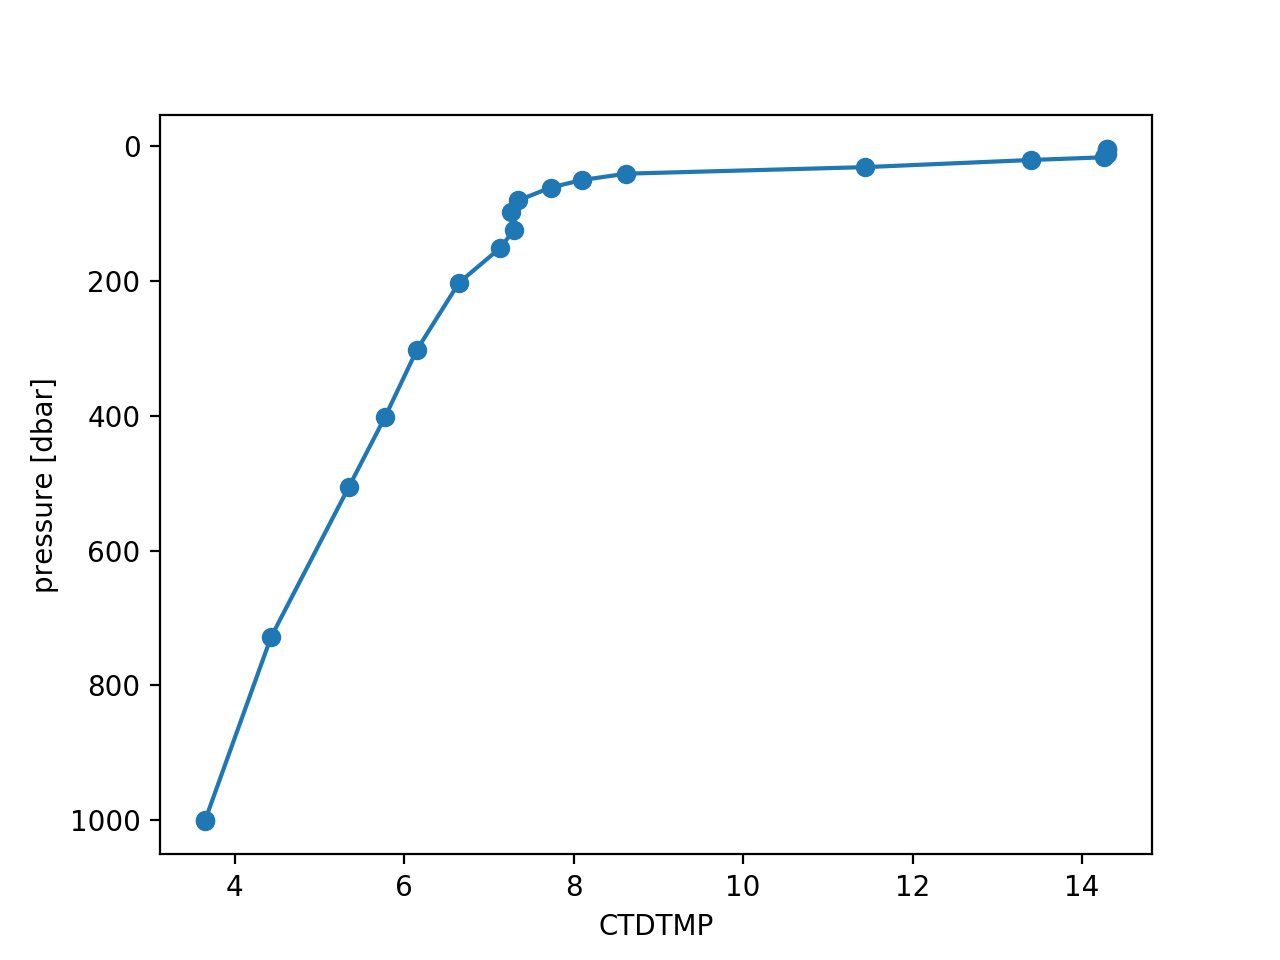

<IPython.core.display.Javascript object>


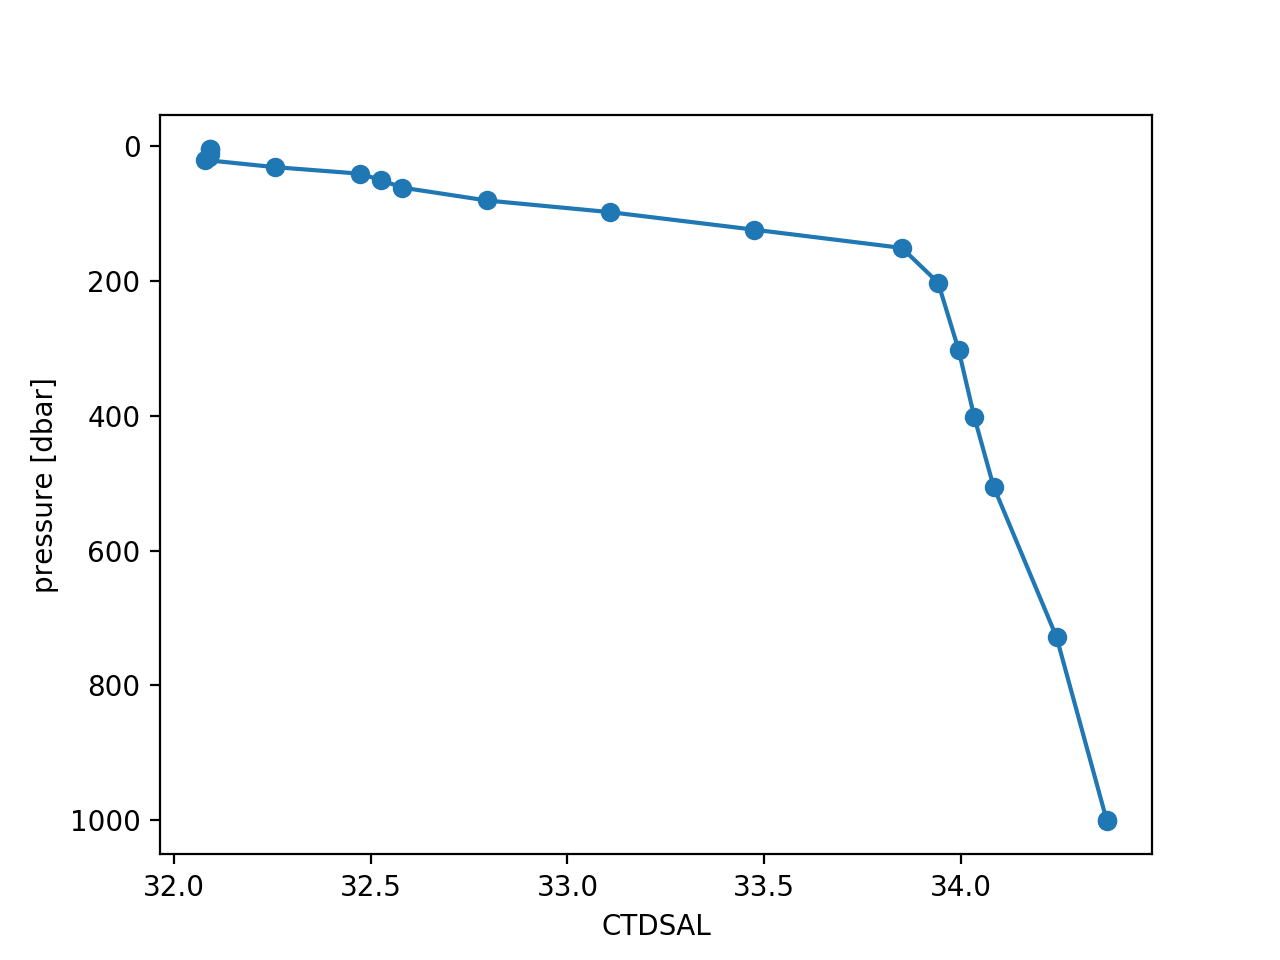

<IPython.core.display.Javascript object>


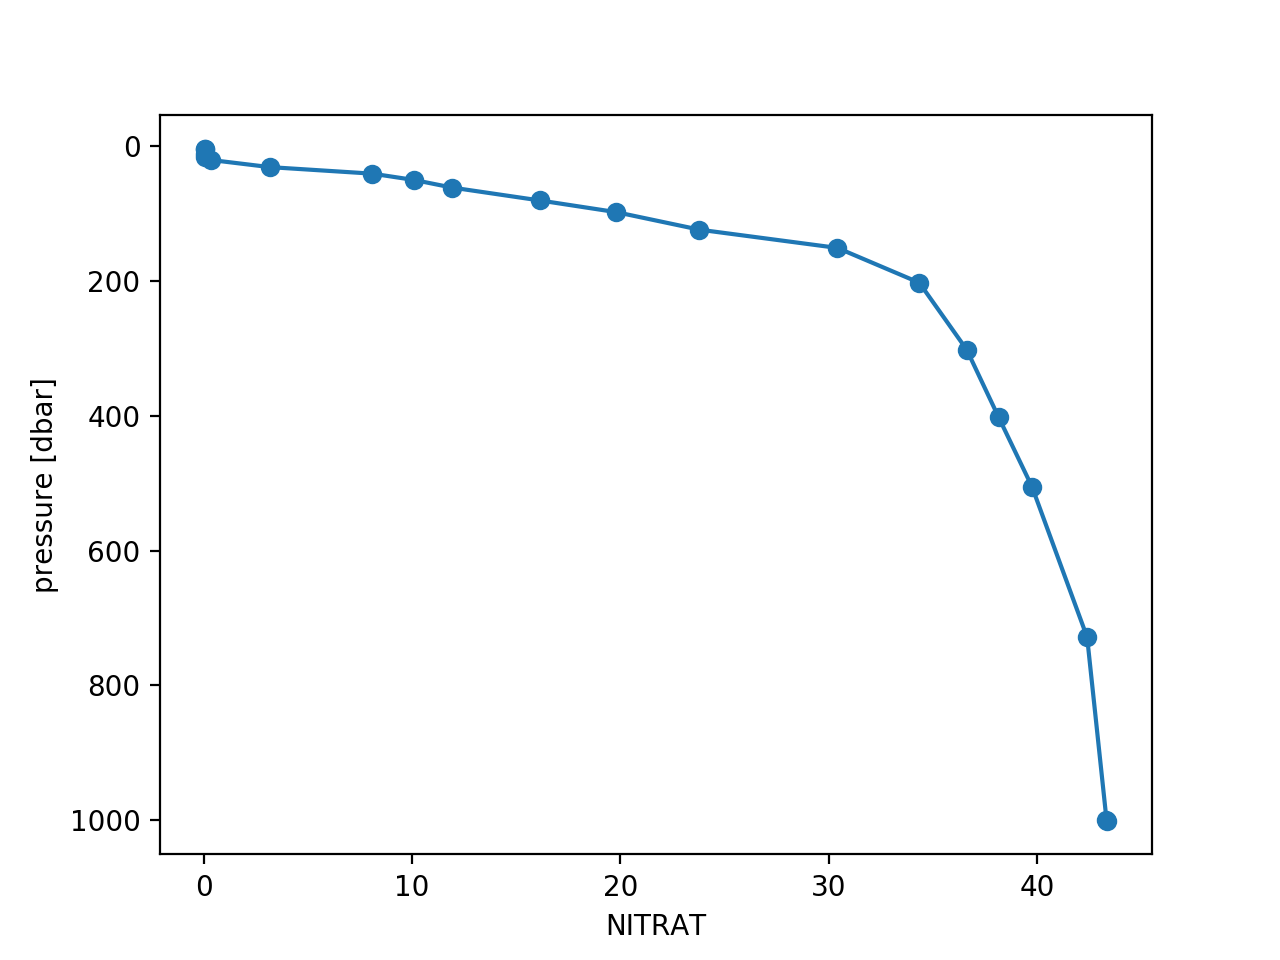

<IPython.core.display.Javascript object>


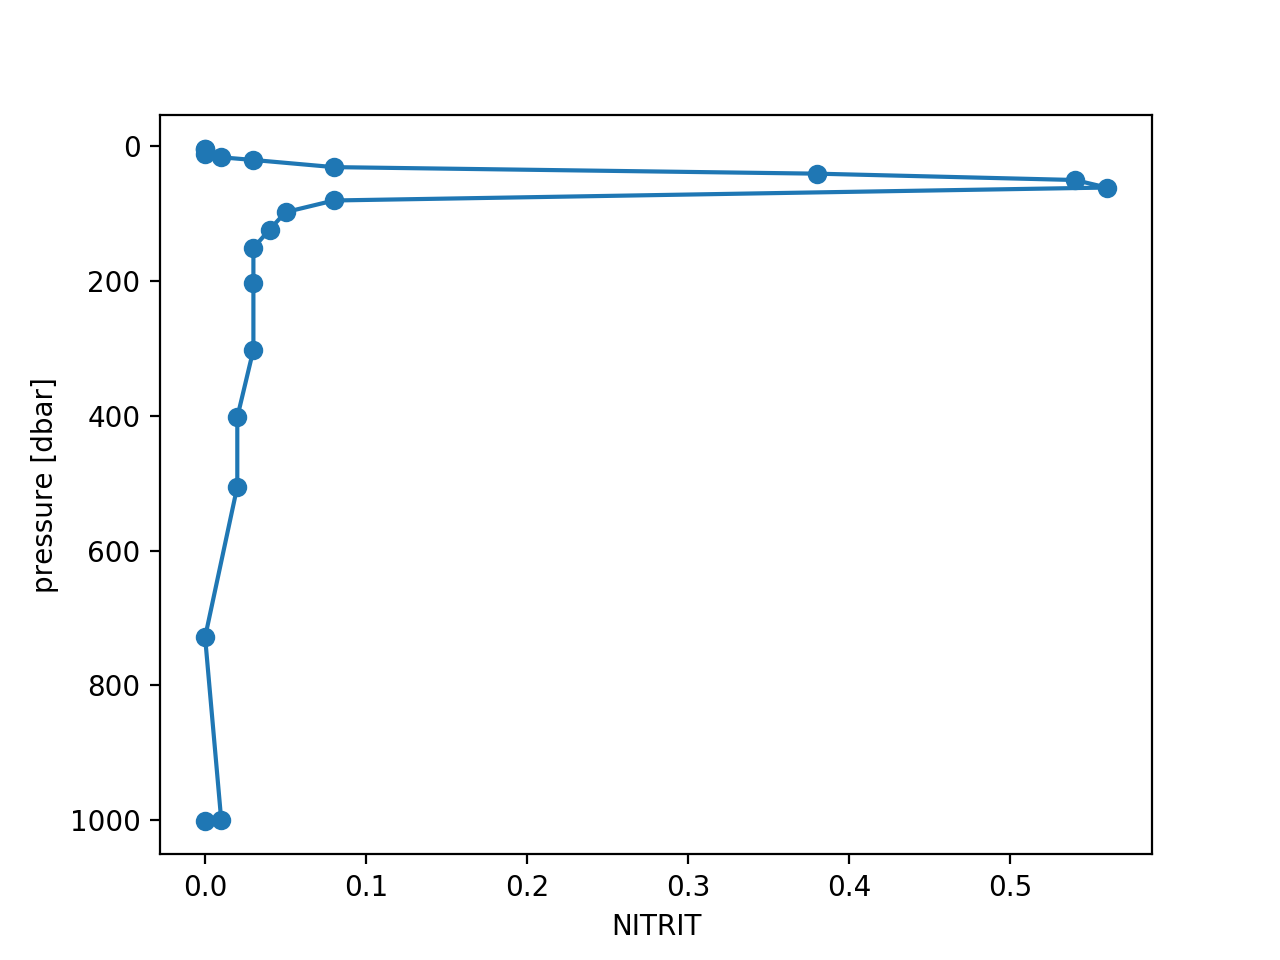

<IPython.core.display.Javascript object>


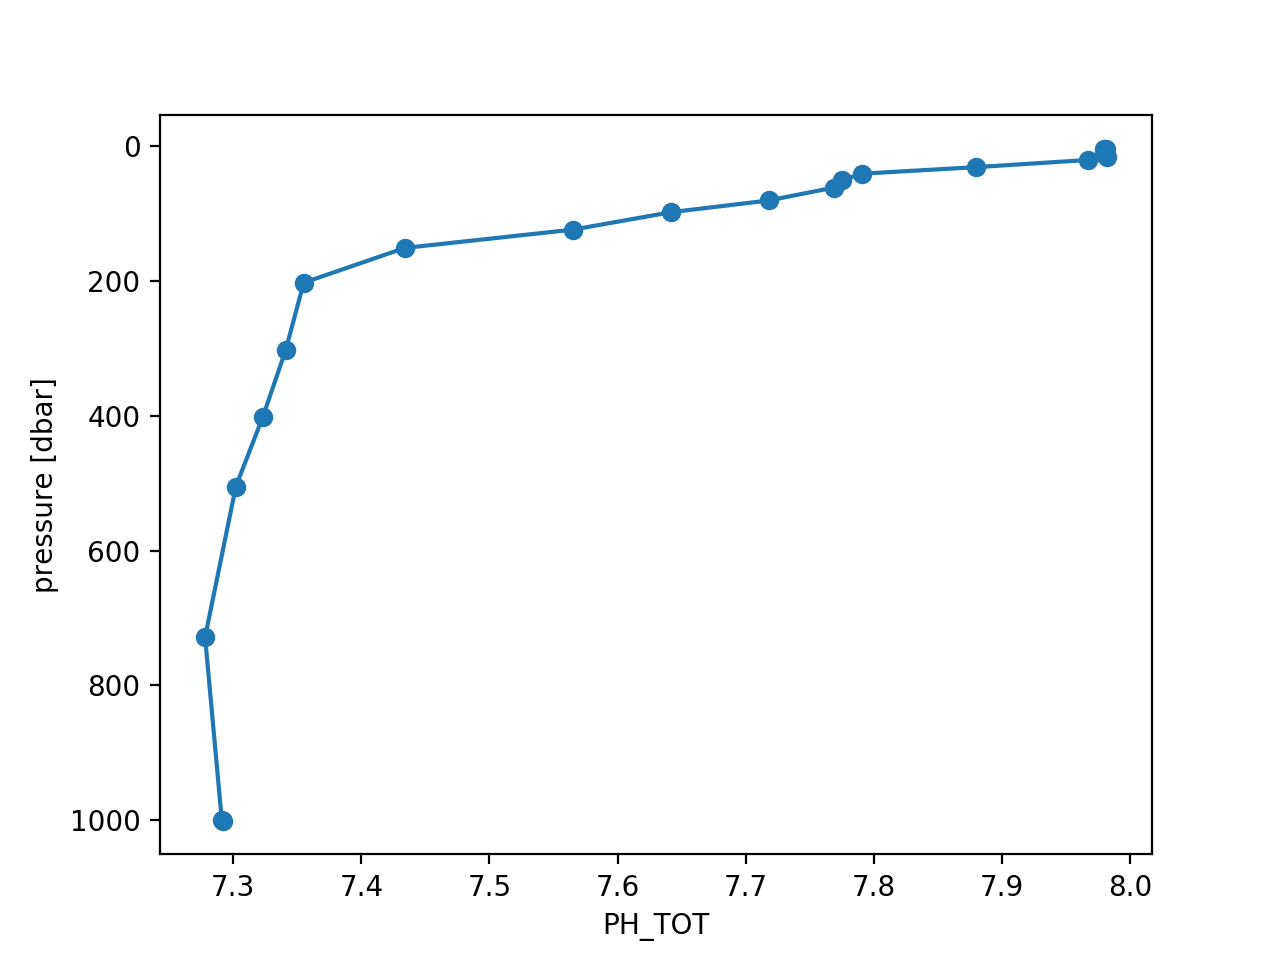

<IPython.core.display.Javascript object>


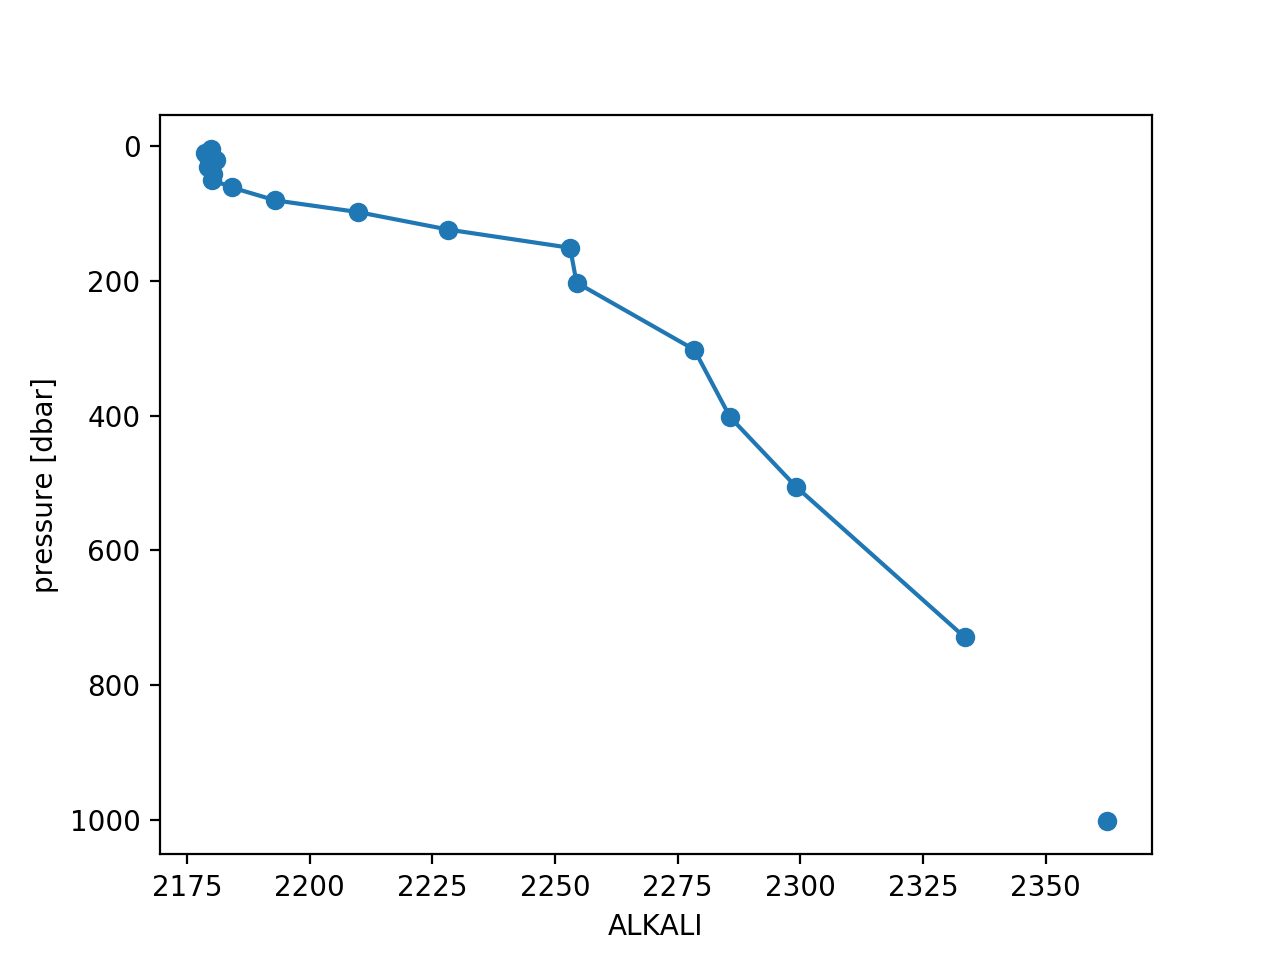

In [8]:
variables_to_plot = ['CTDTMP','CTDSAL','NITRAT','NITRIT','PH_TOT','ALKALI']

for var in variables_to_plot:
    plt.figure()
    plt.plot(cast[var],cast['CTDPRS'],'-o')
    plt.gca().invert_yaxis()
    plt.xlabel(var)
    plt.ylabel('pressure [dbar]')